<a href="https://colab.research.google.com/github/aditya7600/DAI-101/blob/main/ADITYA_23112006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First five rows:
  Startup Name    Industry  Funding Rounds  Investment Amount (USD)  \
0    Startup_1  Blockchain               8             1.335166e+09   
1    Startup_2        SaaS               2             2.781498e+09   
2    Startup_3      EdTech              10             3.309032e+09   
3    Startup_4     Fintech               5             4.050196e+09   
4    Startup_5      EdTech               9             1.645080e+09   

   Valuation (USD)  Number of Investors    Country  Year Founded  \
0     6.621448e+09                   50    Germany          2012   
1     8.363214e+09                   36         UK          2006   
2     1.548270e+10                   39  Singapore          2016   
3     1.268253e+10                   44     France          2021   
4     6.887966e+09                   48      India          2011   

   Growth Rate (%)  
0            77.10  
1           105.52  
2           190.47  
3             9.44  
4           192.00  

Dataset Overview:
<c

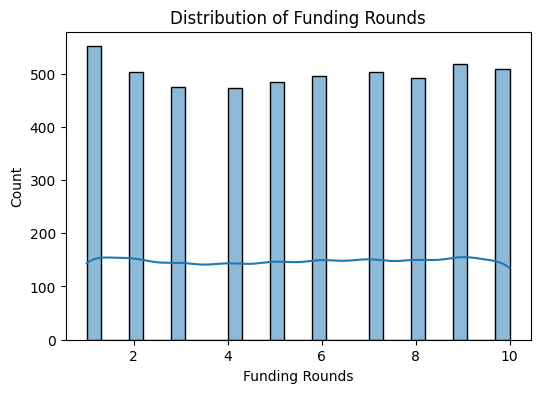

Insight: The histogram for Funding Rounds shows how the data is distributed. A right-skewed distribution indicates high variance, while a normal distribution suggests a balanced dataset.



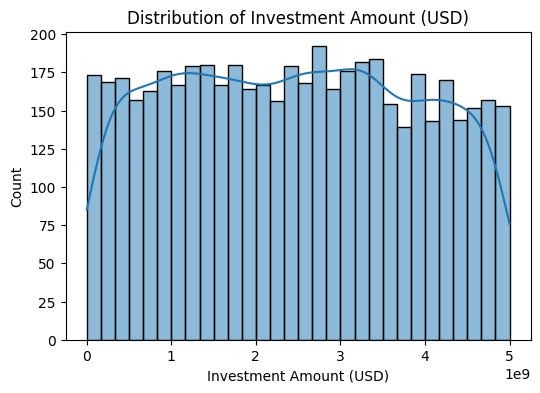

Insight: The histogram for Investment Amount (USD) shows how the data is distributed. A right-skewed distribution indicates high variance, while a normal distribution suggests a balanced dataset.



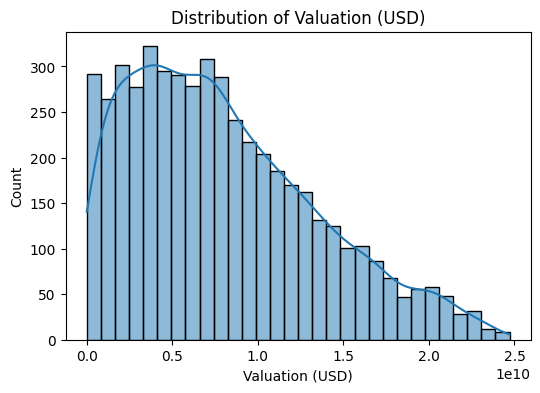

Insight: The histogram for Valuation (USD) shows how the data is distributed. A right-skewed distribution indicates high variance, while a normal distribution suggests a balanced dataset.



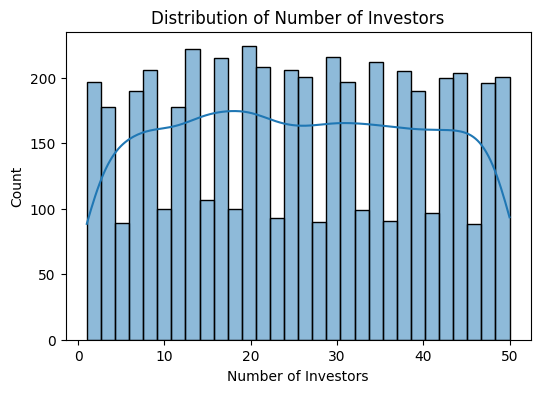

Insight: The histogram for Number of Investors shows how the data is distributed. A right-skewed distribution indicates high variance, while a normal distribution suggests a balanced dataset.



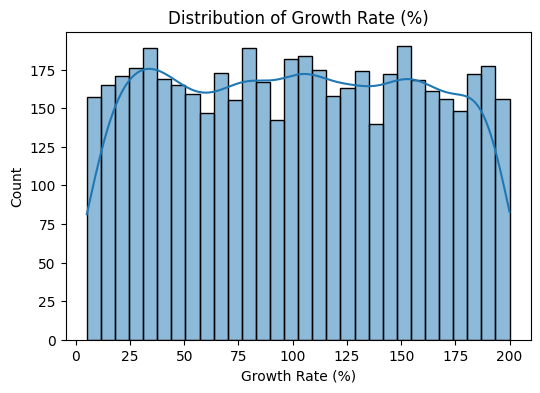

Insight: The histogram for Growth Rate (%) shows how the data is distributed. A right-skewed distribution indicates high variance, while a normal distribution suggests a balanced dataset.



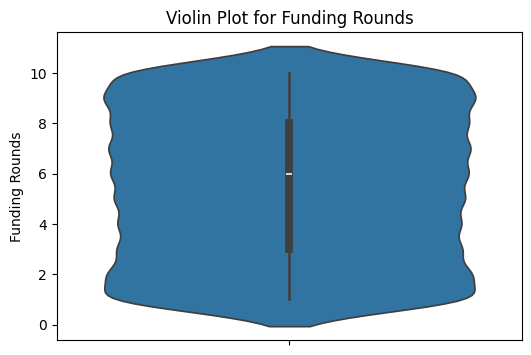

Insight: The violin plot for Funding Rounds shows the density distribution and spread of the data. Wider sections indicate where values are more concentrated.



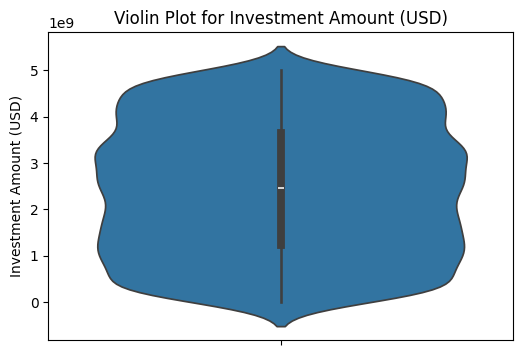

Insight: The violin plot for Investment Amount (USD) shows the density distribution and spread of the data. Wider sections indicate where values are more concentrated.



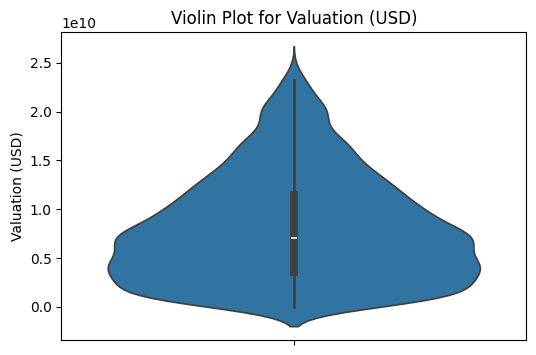

Insight: The violin plot for Valuation (USD) shows the density distribution and spread of the data. Wider sections indicate where values are more concentrated.



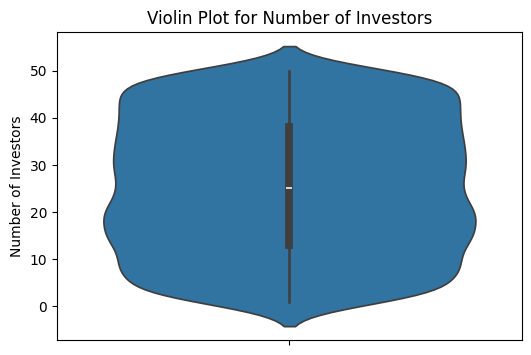

Insight: The violin plot for Number of Investors shows the density distribution and spread of the data. Wider sections indicate where values are more concentrated.



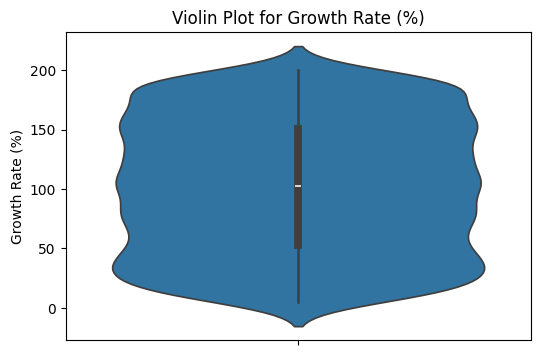

Insight: The violin plot for Growth Rate (%) shows the density distribution and spread of the data. Wider sections indicate where values are more concentrated.



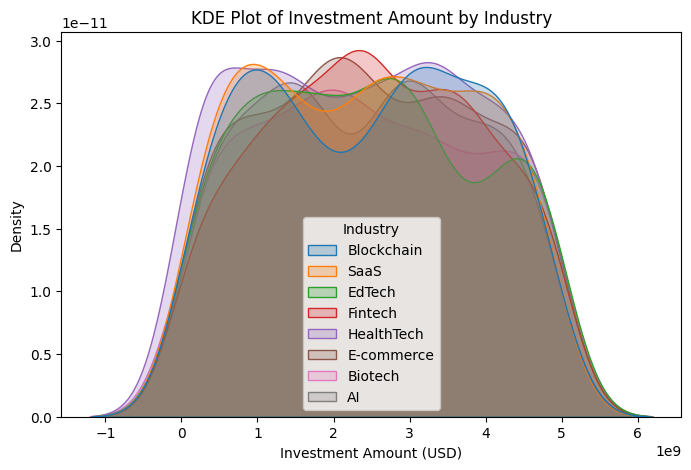

Insight: The KDE plot highlights the distribution of investment amounts across industries, helping identify which industries receive higher investments.



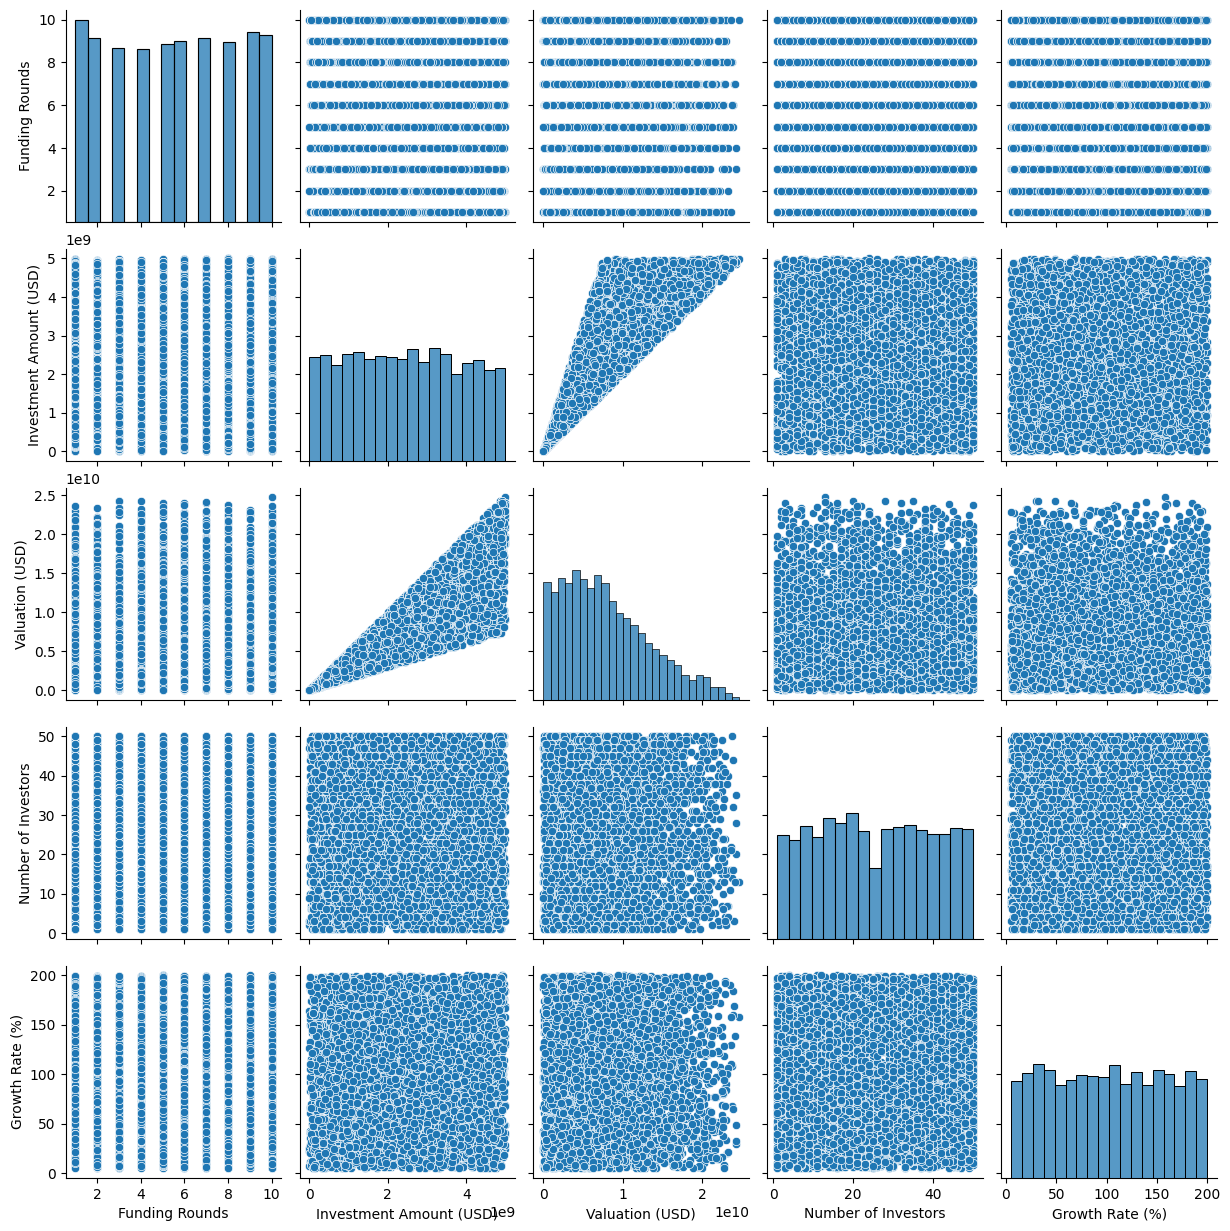

Insight: The pair plot reveals relationships between numerical variables. Strong linear relationships suggest high correlations between variables like Investment Amount and Valuation.



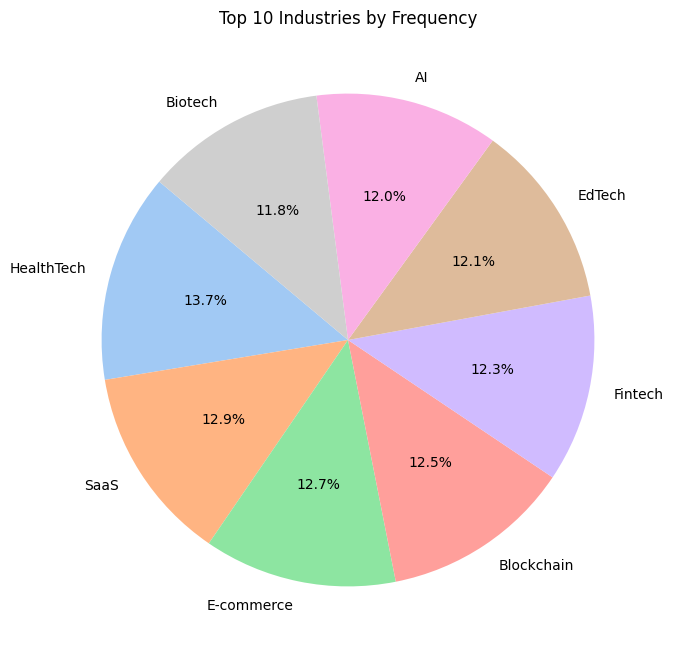

Insight: The pie chart shows the most common industries, indicating which sectors attract the most startups and funding.



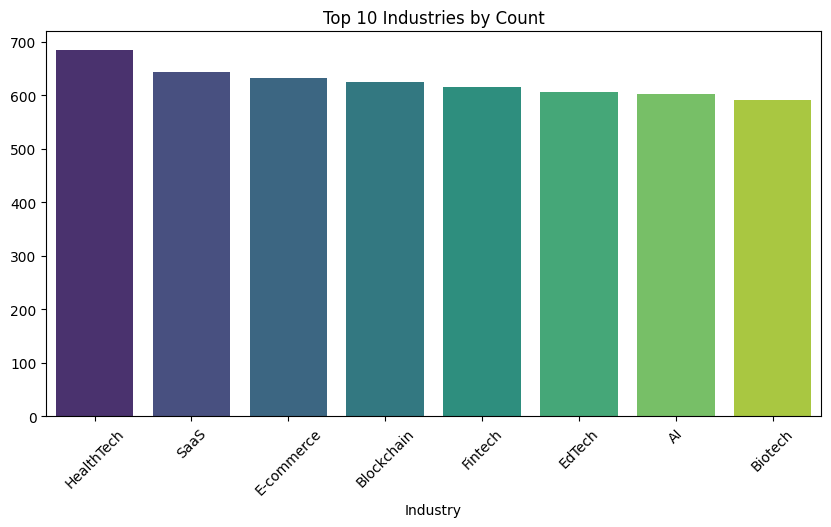

Insight: The bar chart further emphasizes the leading industries, showing their relative presence in the dataset.



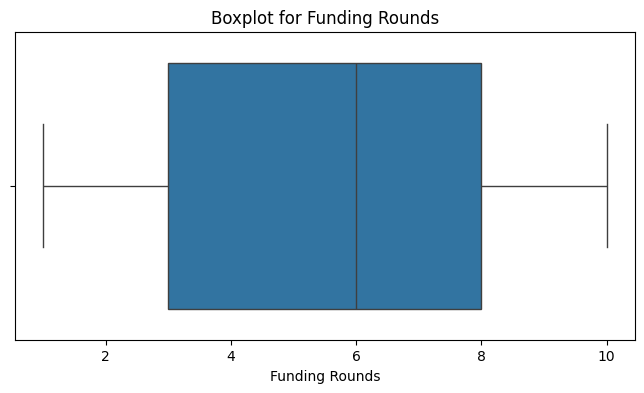

Insight: The boxplot for Funding Rounds highlights potential outliers. Extreme values beyond whiskers indicate anomalies that may need further investigation.



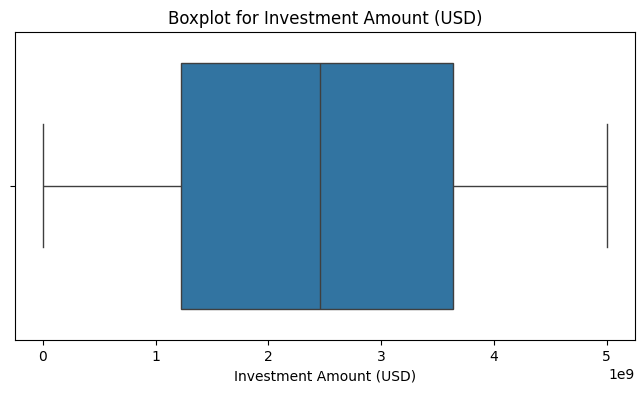

Insight: The boxplot for Investment Amount (USD) highlights potential outliers. Extreme values beyond whiskers indicate anomalies that may need further investigation.



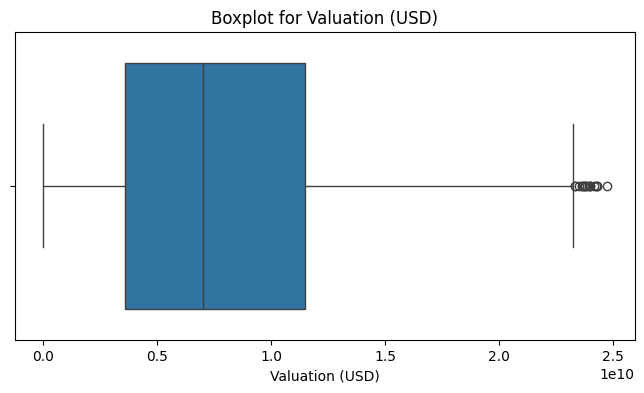

Insight: The boxplot for Valuation (USD) highlights potential outliers. Extreme values beyond whiskers indicate anomalies that may need further investigation.



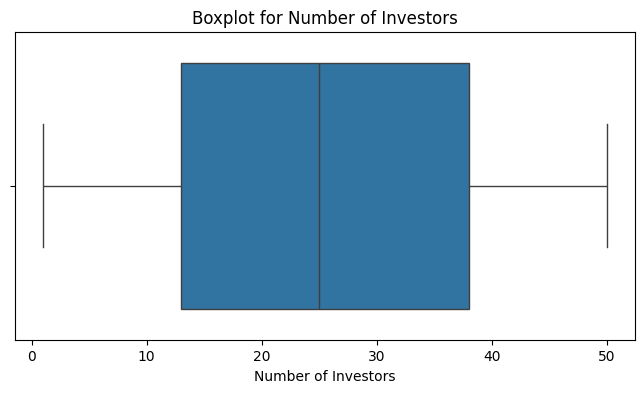

Insight: The boxplot for Number of Investors highlights potential outliers. Extreme values beyond whiskers indicate anomalies that may need further investigation.



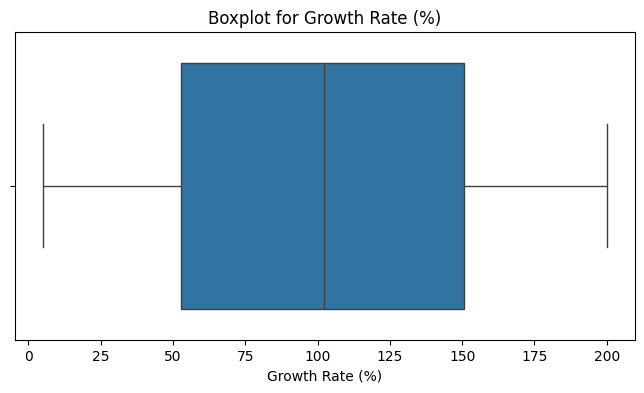

Insight: The boxplot for Growth Rate (%) highlights potential outliers. Extreme values beyond whiskers indicate anomalies that may need further investigation.


Original Shape: (5000, 9), After Outlier Removal: (4999, 9)



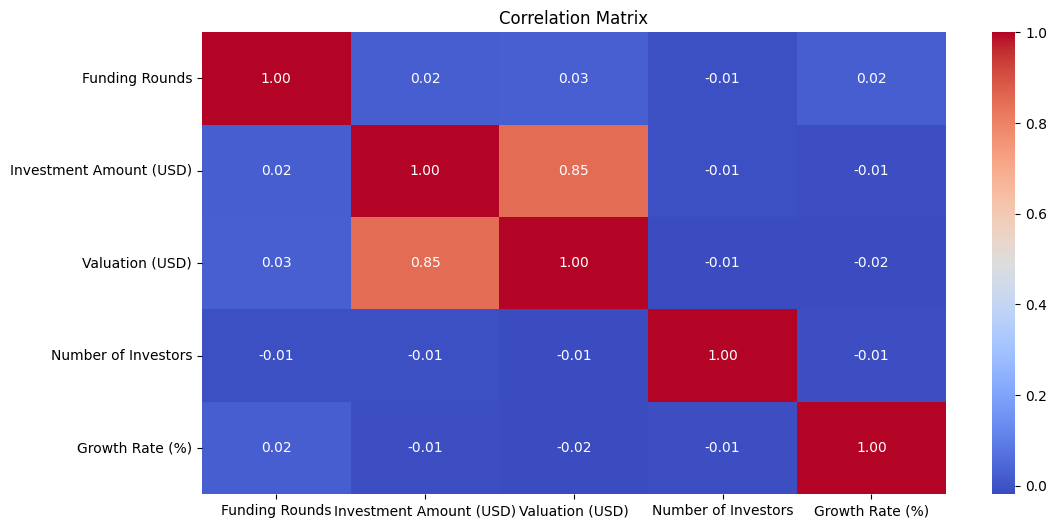

Insight: The correlation matrix highlights strong and weak relationships between variables, aiding in feature selection for predictive modeling.



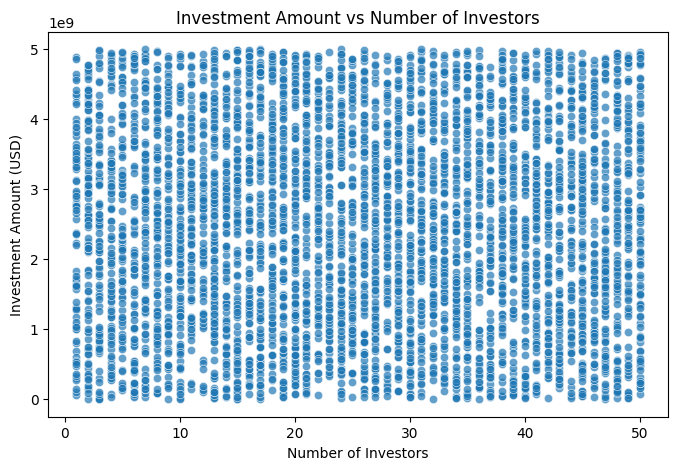

Insight: The scatter plot suggests whether higher investor participation leads to increased investment amounts.



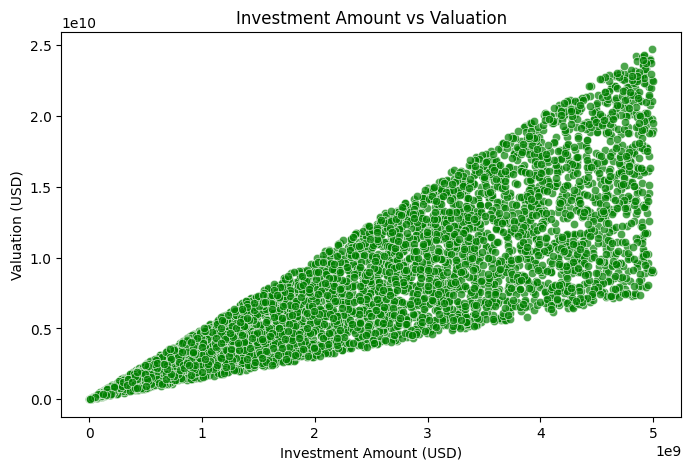

Insight: A strong positive relationship here suggests that larger investments often result in higher startup valuations.



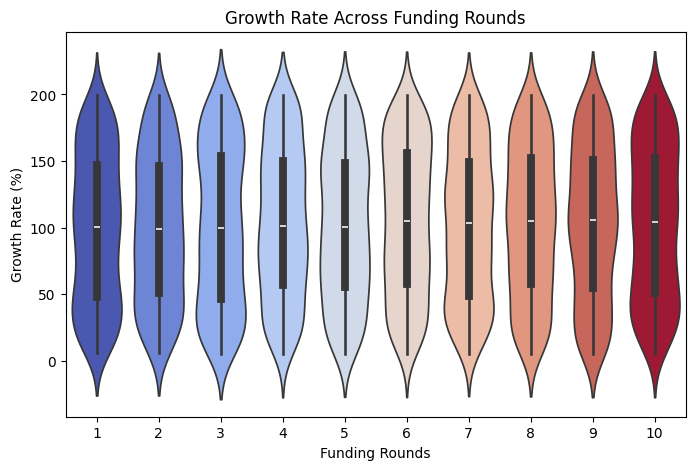

Insight: This plot helps understand how different funding rounds impact startup growth rates.



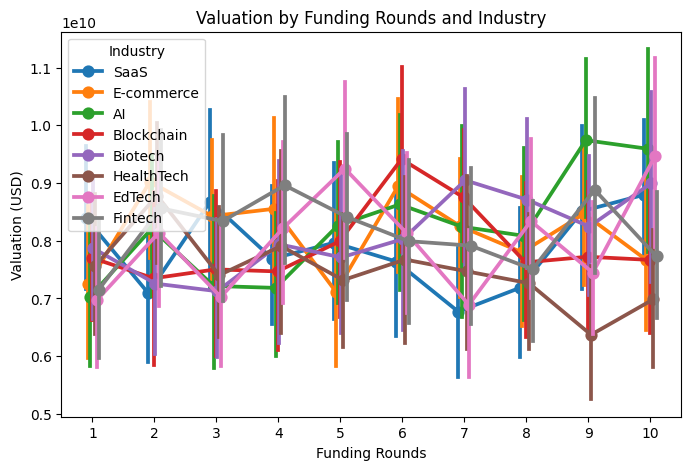

Insight: The point plot shows how valuations vary across funding rounds, with different industries showing unique trends.


Statistical Tests for Funding Rounds vs Investment Amount (USD):
Z-test: Statistic = -121.9528, P-value = 0.0000
T-test: Statistic = -121.9528, P-value = 0.0000
ANOVA: Statistic = 14872.4816, P-value = 0.0000
F-test: Statistic = 238838273974436352.0000, P-value = 0.0000

Statistical Tests for Funding Rounds vs Valuation (USD):
Z-test: Statistic = -102.8635, P-value = 0.0000
T-test: Statistic = -102.8635, P-value = 0.0000
ANOVA: Statistic = 10580.8916, P-value = 0.0000
F-test: Statistic = 3537476070518344192.0000, P-value = 0.0000

Statistical Tests for Funding Rounds vs Number of Investors:
Z-test: Statistic = -97.3336, P-value = 0.0000
T-test: Statistic = -97.3336, P-value = 0.0000
ANOVA: Statistic = 9473.8383, P-value = 0.0000
F-test: Statistic = 23.9979, P-value = 0.0000

Statistical Tests for Funding Rounds vs Growth Rate (%):
Z-test: Statistic = -121.4226, P-

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, ttest_ind, f_oneway, norm, f
from statsmodels.stats.weightstats import ztest

# Load dataset
df = pd.read_csv("/content/startup_growth_investment_data.csv")

# Display basic info
print("First five rows:")
print(df.head())
print("\nDataset Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))
print()

# Define numerical and categorical columns
num_cols = ['Funding Rounds', 'Investment Amount (USD)', 'Valuation (USD)', 'Number of Investors', 'Growth Rate (%)']
cat_cols = ['Industry', 'Country', 'Year Founded']
print()

# Histograms and KDE Plots
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()
    print(f"Insight: The histogram for {col} shows how the data is distributed. A right-skewed distribution indicates high variance, while a normal distribution suggests a balanced dataset.\n")

# Violin Plots
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(y=df[col])
    plt.title(f'Violin Plot for {col}')
    plt.show()
    print(f"Insight: The violin plot for {col} shows the density distribution and spread of the data. Wider sections indicate where values are more concentrated.\n")

# KDE Plot
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Investment Amount (USD)', hue='Industry', fill=True)
plt.title("KDE Plot of Investment Amount by Industry")
plt.show()
print("Insight: The KDE plot highlights the distribution of investment amounts across industries, helping identify which industries receive higher investments.\n")

# Pair Plot
sns.pairplot(df[num_cols])
plt.show()
print("Insight: The pair plot reveals relationships between numerical variables. Strong linear relationships suggest high correlations between variables like Investment Amount and Valuation.\n")

# Pie Chart for Top 10 Industries
industry_counts = df['Industry'].value_counts().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Top 10 Industries by Frequency")
plt.show()
print("Insight: The pie chart shows the most common industries, indicating which sectors attract the most startups and funding.\n")

# Bar Plot for Top 10 Industries
plt.figure(figsize=(10, 5))
sns.barplot(x=industry_counts.index, y=industry_counts.values, hue=industry_counts.index, dodge=False, palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Industries by Count")
plt.show()
print("Insight: The bar chart further emphasizes the leading industries, showing their relative presence in the dataset.\n")

# Outlier Detection
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()
    print(f"Insight: The boxplot for {col} highlights potential outliers. Extreme values beyond whiskers indicate anomalies that may need further investigation.\n")

# Removing extreme outliers
df_no_outliers = df[(np.abs(zscore(df[num_cols])) < 3).all(axis=1)]
print(f"\nOriginal Shape: {df.shape}, After Outlier Removal: {df_no_outliers.shape}\n")

# Correlation Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()
print("Insight: The correlation matrix highlights strong and weak relationships between variables, aiding in feature selection for predictive modeling.\n")

# Scatter Plots
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Number of Investors', y='Investment Amount (USD)', alpha=0.7)
plt.title("Investment Amount vs Number of Investors")
plt.show()
print("Insight: The scatter plot suggests whether higher investor participation leads to increased investment amounts.\n")

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Investment Amount (USD)', y='Valuation (USD)', alpha=0.7, color='green')
plt.title("Investment Amount vs Valuation")
plt.show()
print("Insight: A strong positive relationship here suggests that larger investments often result in higher startup valuations.\n")

# Funding Rounds vs Growth Rate (Violin Plot)
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Funding Rounds', y='Growth Rate (%)', hue='Funding Rounds', palette='coolwarm', legend=False)
plt.title("Growth Rate Across Funding Rounds")
plt.show()
print("Insight: This plot helps understand how different funding rounds impact startup growth rates.\n")

# Point Plot
plt.figure(figsize=(8, 5))
sns.pointplot(data=df, x='Funding Rounds', y='Valuation (USD)', hue='Industry', dodge=True)
plt.title("Valuation by Funding Rounds and Industry")
plt.show()
print("Insight: The point plot shows how valuations vary across funding rounds, with different industries showing unique trends.\n")

# Statistical Tests
def perform_tests(df, cols):
    results = {}
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            col1, col2 = cols[i], cols[j]

            # Z-test
            z_stat, z_pval = ztest(df[col1].dropna(), df[col2].dropna())

            # T-test
            t_stat, t_pval = ttest_ind(df[col1].dropna(), df[col2].dropna(), equal_var=False)

            # ANOVA
            anova_stat, anova_pval = f_oneway(df[col1].dropna(), df[col2].dropna())

            # F-test for variance
            var1, var2 = np.var(df[col1].dropna(), ddof=1), np.var(df[col2].dropna(), ddof=1)
            f_stat = var1 / var2 if var1 > var2 else var2 / var1
            f_pval = 1 - f.cdf(f_stat, len(df[col1].dropna()) - 1, len(df[col2].dropna()) - 1)

            results[f"{col1} vs {col2}"] = {"Z-test": (z_stat, z_pval), "T-test": (t_stat, t_pval), "ANOVA": (anova_stat, anova_pval), "F-test": (f_stat, f_pval)}
    return results

test_results = perform_tests(df, num_cols)
for key, value in test_results.items():
    print(f"\nStatistical Tests for {key}:")
    for test, result in value.items():
        print(f"{test}: Statistic = {result[0]:.4f}, P-value = {result[1]:.4f}")

# Conclusion
print("\nConclusion:")
print("1. The dataset shows strong correlations between Investment Amount and Valuation, suggesting that higher investments often result in higher valuations.")
print("2. Funding Rounds impact Growth Rate significantly, as seen in the violin plots, where later-stage rounds often show lower growth rates.")
print("3. Statistical tests confirm that differences between numerical features are significant, supporting the hypothesis that investment and valuation are key differentiators.")
print("4. Industry distribution shows a concentration in a few key sectors, indicating potential investment hotspots.")
print("5. Outliers detected in investment and valuation suggest a few extreme cases that may need separate analysis.")
print()
print("Analysis Completed.")